In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import feature_engine as fe

ModuleNotFoundError: ignored

In [ ]:
# description of features
# handy while performing EDA

descript = pd.read_excel('data_description.xlsx')
descript.head()

,Название поля,Описание
0,id_contract,Идентификатор контракта
1,id_client,Идентификатор клиента
2,SIGN_DATE,Дата подписания контракта
3,IP_flag,Флаг ИП
4,TARGET,Целевая переменная - факт наличия предъявления...


In [ ]:
descript = descript.rename(columns = {'Название поля': 'field_name', 'Описание': 'description'}, inplace = False)

In [ ]:
def get_feature_descr_by_name(feature_name):
    return descript[descript['field_name'] == feature_name]['description'].item()

In [ ]:
get_feature_descr_by_name('id_client')

'Идентификатор клиента'

In [ ]:
train = pd.read_csv('train_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251')
test = pd.read_csv('test_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251')

In [ ]:
train.head(10)

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,...,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,7.337400e+07,NaN,NaN,...,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,122828000.0,6.103280e+08,NaN,809426000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,10099,01JAN2018:00:00:00,0,0,2.946220e+08,186000.0,2.311130e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,10714,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2740,01JAN2018:00:00:00,0,0,2.636311e+10,14172000.0,2.227751e+10,301366000.0,145000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2310,01JAN2018:00:00:00,0,0,1.700000e+07,NaN,1.700000e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,3189,01JAN2018:00:00:00,0,0,1.601560e+08,NaN,3.415300e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.head(10)

,id_contract,id_client,SIGN_DATE,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,...,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,17892,3620,08APR2019:00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17893,4101,08APR2019:00:00:00,0,1906000.0,NaN,1906000.0,NaN,NaN,NaN,...,7439.0,7100.0,1.187411e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17894,9589,08APR2019:00:00:00,0,147000.0,NaN,147000.0,NaN,NaN,NaN,...,362.0,344.0,9.836260e+07,NaN,1.0,3.0,NaN,NaN,NaN,NaN
3,17895,11546,08APR2019:00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17896,12558,08APR2019:00:00:00,0,26000.0,NaN,NaN,NaN,26000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,17897,7933,08APR2019:00:00:00,0,191334000.0,NaN,191300000.0,NaN,34000.0,NaN,...,283.0,270.0,5.130604e+08,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,17898,8980,08APR2019:00:00:00,0,1892000.0,233000.0,1659000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17899,2582,08APR2019:00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17900,7495,08APR2019:00:00:00,0,5080000.0,NaN,5080000.0,NaN,NaN,NaN,...,21.0,20.0,6.302628e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17901,8429,08APR2019:00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,11.0,5.893538e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.shape, test.shape

((17891, 124), (7330, 123))

In [ ]:
train.describe()

,id_contract,id_client,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,...,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,AGE
count,17891.000000,17891.000000,17891.000000,17891.000000,6.936000e+03,1.420000e+03,6.341000e+03,3.460000e+02,1.499000e+03,2.500000e+03,...,6.331000e+03,6784.000000,6784.000000,6784.000000,6784.000000,6.784000e+03,5.0,239.000000,1509.000000,1419.000000
mean,8946.000000,6630.652786,0.195629,0.413001,3.184582e+09,1.136357e+08,2.287078e+09,4.981780e+07,3.389027e+09,1.341100e+08,...,1.112049e+08,651.184699,16.176739,354.557341,323.424823,2.544790e+08,1.0,1.502092,2.325381,41.916843
std,5164.831169,3659.132885,0.396695,0.492387,3.062184e+10,9.413832e+08,2.016291e+10,2.561433e+08,2.076766e+10,6.466805e+08,...,5.293399e+08,2552.512856,50.684059,1339.773863,1258.815709,1.140965e+09,0.0,1.511509,2.316937,10.769157
min,1.000000,1.000000,0.000000,0.000000,-1.820000e+05,1.000000e+03,1.000000e+03,-1.175000e+06,1.000000e+03,-2.540000e+05,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,1.000000,1.000000,21.000000
25%,4473.500000,3452.000000,0.000000,0.000000,4.335000e+05,7.300000e+04,7.180000e+05,3.694000e+06,1.130000e+05,1.720000e+05,...,1.418006e+06,35.000000,0.000000,17.000000,12.000000,4.296130e+06,1.0,1.000000,1.000000,32.000000
50%,8946.000000,6560.000000,0.000000,0.000000,4.308000e+06,2.760000e+05,4.984000e+06,3.694000e+06,7.239000e+06,3.907000e+06,...,7.371221e+06,136.000000,3.000000,75.000000,58.000000,1.865707e+07,1.0,1.000000,2.000000,40.000000
75%,13418.500000,10080.000000,0.000000,1.000000,6.661650e+07,4.409500e+06,5.594400e+07,1.195650e+07,1.485000e+08,4.848200e+07,...,3.373519e+07,443.000000,10.000000,219.250000,176.250000,9.359097e+07,1.0,2.000000,2.000000,49.000000
max,17891.000000,12735.000000,1.000000,1.000000,1.250774e+12,1.342100e+10,8.783281e+11,2.989645e+09,2.833230e+11,1.390180e+10,...,4.946254e+09,51040.000000,809.000000,24749.000000,22821.000000,3.813102e+10,1.0,13.000000,25.000000,78.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Columns: 124 entries, id_contract to CITIZENSHIP_NAME
dtypes: float64(108), int64(4), object(12)
memory usage: 16.9+ MB


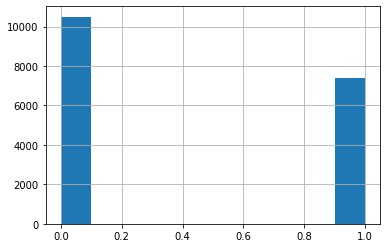

In [ ]:
train['TARGET'].hist()

In [ ]:
# create submission

from time import time

def create_submission(test_df, extend_info = ''):
    t = time()
    sub_name = 'sub_' + str(t)
    if len(extend_info) > 0:
        sub_name+='_'
        sub_name+=extend_info
    sub_name+='.csv'
    
    test_df[['id_contract', 'TARGET']].to_csv(sub_name, sep=';', index=False)
    test_df[['id_contract', 'TARGET']].head()

In [ ]:
print("PERCENT OF NANS IN TRAIN AND TEST")

for col in list(test.columns):
    print('{}: {}; {}'.format(col, train[col].isnull().sum() / train.shape[0],
                             test[col].isnull().sum() / test.shape[0]))

PERCENT OF NANS IN TRAIN AND TEST
id_contract: 0.0; 0.0
id_client: 0.0; 0.0
SIGN_DATE: 0.0; 0.0
IP_flag: 0.0; 0.0
F1100: 0.6123190430942932; 0.660300136425648
F1110: 0.9206304846011961; 0.9375170532060028
F1150: 0.6455759879268906; 0.683356070941337
F1160: 0.9806606673746576; 0.9892223738062755
F1170: 0.916214856631826; 0.9336971350613915
F1180: 0.8602649376781623; 0.9073669849931787
F1190: 0.9150410821083226; 0.9375170532060028
F1200: 0.33765580459448885; 0.3736698499317872
F1210: 0.4558716673187636; 0.4819918144611187
F1220: 0.8156615057850316; 0.8459754433833561
F1230: 0.3581130177184059; 0.4023192360163711
F1240: 0.8403666648035325; 0.8776261937244202
F1250: 0.35107037057738527; 0.39740791268758524
F1260: 0.7561902632608574; 0.8113233287858117
F1300: 0.33765580459448885; 0.37312414733969984
F1310: 0.5693924319490247; 0.6173260572987722
F1320: 0.9945782795819127; 0.9989085948158254
F1350: 0.9464535241182718; 0.9646657571623465
F1360: 0.9234810798725617; 0.9474761255115962
F1370: 0.5

In [ ]:
train.corr()

,id_contract,id_client,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,...,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,AGE
id_contract,1.000000,0.023810,-0.009581,-0.004478,0.004098,-0.011680,0.008394,0.143754,-0.022575,-0.013526,...,-0.073187,-0.030189,-0.011533,-0.048897,-0.048853,-0.074340,NaN,-0.247331,-0.044539,-0.121874
id_client,0.023810,1.000000,0.010163,0.034947,0.058962,0.096023,0.065465,0.019351,0.095430,0.015802,...,0.131815,0.012718,-0.006984,0.019214,0.021258,0.111658,NaN,0.112322,-0.020479,-0.205127
IP_flag,-0.009581,0.010163,1.000000,-0.066822,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARGET,-0.004478,0.034947,-0.066822,1.000000,-0.062277,-0.062953,-0.061889,-0.110808,-0.055860,-0.109962,...,0.097248,-0.037852,0.022034,-0.058045,-0.060983,0.042638,NaN,-0.139542,-0.211826,-0.347063
F1100,0.004098,0.058962,NaN,-0.062277,1.000000,0.692715,0.923675,0.782340,0.784996,0.560055,...,0.057879,0.000864,-0.012006,0.009977,0.011044,0.086238,NaN,0.270077,0.027102,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUM_95_EVER,-0.074340,0.111658,NaN,0.042638,0.086238,0.045071,0.039445,-0.373819,0.157618,-0.038704,...,0.906995,0.297636,0.158373,0.384364,0.385907,1.000000,NaN,0.927116,0.098479,NaN
FLAG_DISQUALIFICATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COUNT_CHANGE_YEAR,-0.247331,0.112322,NaN,-0.139542,0.270077,NaN,0.268530,NaN,0.388099,-0.248746,...,0.916512,0.929701,0.485050,0.918972,0.930405,0.927116,NaN,1.000000,0.910212,NaN
COUNT_CHANGE_EVER,-0.044539,-0.020479,NaN,-0.211826,0.027102,-0.051033,0.100009,0.054424,-0.048673,-0.061545,...,0.032479,0.244442,-0.070983,0.344138,0.364887,0.098479,NaN,0.910212,1.000000,NaN


In [ ]:
# check features corr with target

for col in test.columns:
    try:
        print('{}: {}'.format(col, train[col].corr(train['TARGET'])))
    except:
        pass

id_contract: -0.004478353694230248
id_client: 0.0349470951941114
IP_flag: -0.0668219795475486
F1100: -0.06227729639959581
F1110: -0.06295293357105998
F1150: -0.06188914243809774
F1160: -0.11080810186954529
F1170: -0.055860264453064995
F1180: -0.10996194898412535
F1190: -0.01569871935032447
F1200: -0.10392668096284759
F1210: -0.05783068006515062
F1220: -0.06596455083379943
F1230: -0.09867327497315165
F1240: -0.08309778962828968
F1250: -0.06760436220369616
F1260: -0.050520233429581056
F1300: -0.061728190042565044
F1310: -0.048809643097762555
F1320: 0.06039736345733792
F1350: -0.04703082971291461
F1360: -0.014914369552746675
F1370: -0.049179821182162874
F1400: -0.05463324458967885
F1410: -0.07862581412708314
F1420: -0.06635501914326122
F1450: -0.16552413378769448
F1500: -0.09870577188206535
F1510: -0.0825153404958807
F1520: -0.11799479920807679
F1530: -0.045168290692295984
F1550: -0.08668480603793384
F1600: -0.07311681562536784
F1700: -0.07312921440732675
F2100: -0.09145978937835039
F2110

In [ ]:
len(train['SIGN_DATE'].unique()), len(test['SIGN_DATE'].unique())

(439, 248)

In [ ]:
train['SIGN_DATE'].unique()

array(['01JAN2018:00:00:00', '02JAN2018:00:00:00', '03JAN2018:00:00:00',
       '04JAN2018:00:00:00', '05JAN2018:00:00:00', '06JAN2018:00:00:00',
       '07JAN2018:00:00:00', '08JAN2018:00:00:00', '09JAN2018:00:00:00',
       '10JAN2018:00:00:00', '11JAN2018:00:00:00', '12JAN2018:00:00:00',
       '13JAN2018:00:00:00', '14JAN2018:00:00:00', '15JAN2018:00:00:00',
       '16JAN2018:00:00:00', '17JAN2018:00:00:00', '18JAN2018:00:00:00',
       '19JAN2018:00:00:00', '20JAN2018:00:00:00', '21JAN2018:00:00:00',
       '22JAN2018:00:00:00', '23JAN2018:00:00:00', '24JAN2018:00:00:00',
       '25JAN2018:00:00:00', '26JAN2018:00:00:00', '27JAN2018:00:00:00',
       '28JAN2018:00:00:00', '29JAN2018:00:00:00', '30JAN2018:00:00:00',
       '31JAN2018:00:00:00', '01FEB2018:00:00:00', '02FEB2018:00:00:00',
       '03FEB2018:00:00:00', '04FEB2018:00:00:00', '05FEB2018:00:00:00',
       '06FEB2018:00:00:00', '07FEB2018:00:00:00', '08FEB2018:00:00:00',
       '09FEB2018:00:00:00', '10FEB2018:00:00:00', 

In [ ]:
# look at date features

train['DATEFIRSTREG'].head(3)

0    10AUG1993:00:00:00
1                   NaN
2    04FEB1992:00:00:00
Name: DATEFIRSTREG, dtype: object

In [ ]:
train['TAXREG_REGDATE'].head(3)

0    01JUL2006:00:00:00
1                   NaN
2    30AUG2002:00:00:00
Name: TAXREG_REGDATE, dtype: object

In [ ]:
time_features = ['SIGN_DATE', 'DATEFIRSTREG', 'TAXREG_REGDATE', 'TAXREGPAY_REGDATE', 'BIRTHDATE']

In [ ]:
# 01JAN2018:00:00:00 - date format
from datetime import datetime
import math

def parse_date(date):
    try:
        monthes = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
        day = int(date[0:2])
        month = monthes.index(date[2:5]) + 1
        year = int(date[5:9])
        return datetime(year, month, day)
    except:
        pass

In [ ]:
date = '01JAN2018:00:00:00'
parse_date(date)

datetime.datetime(2018, 1, 1, 0, 0)

In [ ]:
# cols to drop

cols_to_drop = []

for col in list(test.columns):
    if (train[col].isnull().sum() / train.shape[0]) > 0.9 or (test[col].isnull().sum() / test.shape[0]) > 0.9:
        cols_to_drop.append(col)
        
train = train.drop(columns = cols_to_drop)
test = test.drop(columns = cols_to_drop)

In [ ]:
train.shape, test.shape

((17891, 105), (7330, 104))

In [ ]:
train.head(15)

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1150,F1200,F1210,F1220,...,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,1.125573e+09,1.048287e+10,105901000.0,127510000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,7.337400e+07,2.161000e+07,2378000.0,NaN,...,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,6.103280e+08,5.786965e+09,12001000.0,71000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,10099,01JAN2018:00:00:00,0,0,2.946220e+08,2.311130e+08,2.805941e+09,110934000.0,6000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,10714,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2740,01JAN2018:00:00:00,0,0,2.636311e+10,2.227751e+10,8.184851e+09,467753000.0,382000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2310,01JAN2018:00:00:00,0,0,1.700000e+07,1.700000e+07,1.757000e+09,8000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,3189,01JAN2018:00:00:00,0,0,1.601560e+08,3.415300e+07,3.172194e+09,137000.0,22658000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
last_fts = list(set(time_features) & set(train.columns))

train[last_fts].head()

,DATEFIRSTREG,TAXREGPAY_REGDATE,TAXREG_REGDATE,SIGN_DATE
0,10AUG1993:00:00:00,01JAN1960:00:00:00,01JUL2006:00:00:00,01JAN2018:00:00:00
1,NaN,NaN,NaN,01JAN2018:00:00:00
2,04FEB1992:00:00:00,01JAN1960:00:00:00,30AUG2002:00:00:00,01JAN2018:00:00:00
3,01JUL2005:00:00:00,01JAN1960:00:00:00,01JUL2005:00:00:00,01JAN2018:00:00:00
4,NaN,NaN,NaN,01JAN2018:00:00:00


In [ ]:
train['TAXREG_REGDATE']

0        01JUL2006:00:00:00
1                       NaN
2        30AUG2002:00:00:00
3        01JUL2005:00:00:00
4                       NaN
                ...        
17886    08MAY2007:00:00:00
17887    20DEC2002:00:00:00
17888    20OCT2016:00:00:00
17889    29AUG2017:00:00:00
17890    07NOV2005:00:00:00
Name: TAXREG_REGDATE, Length: 17891, dtype: object

In [ ]:
time_features = list(set(time_features) & set(train.columns))
time_features

['DATEFIRSTREG', 'TAXREGPAY_REGDATE', 'TAXREG_REGDATE', 'SIGN_DATE']

In [ ]:
for col in time_features:
    train[col] = train.apply(lambda row: parse_date(row[col]), axis = 1)
    #test[col] = test.apply(lambda row: parse_date(row[col]), axis = 1),

In [ ]:
train[time_features]

,DATEFIRSTREG,TAXREGPAY_REGDATE,TAXREG_REGDATE,SIGN_DATE
0,1993-08-10,1960-01-01,2006-07-01,2018-01-01
1,NaT,NaT,NaT,2018-01-01
2,1992-02-04,1960-01-01,2002-08-30,2018-01-01
3,2005-07-01,1960-01-01,2005-07-01,2018-01-01
4,NaT,NaT,NaT,2018-01-01
...,...,...,...,...
17886,2007-05-08,1960-01-01,2007-05-08,2019-04-07
17887,1997-07-31,1960-01-01,2002-12-20,2019-04-08
17888,2016-10-20,1960-01-01,2016-10-20,2019-04-08
17889,2017-08-29,1960-01-01,2017-08-29,2019-04-08


In [ ]:
for col in time_features:
    test[col] = test.apply(lambda row: parse_date(row[col]), axis = 1)

In [ ]:
test[time_features]

,DATEFIRSTREG,TAXREGPAY_REGDATE,TAXREG_REGDATE,SIGN_DATE
0,NaT,NaT,NaT,2019-04-08
1,2010-03-02,1960-01-01,2010-03-02,2019-04-08
2,1998-10-12,1960-01-01,2002-12-29,2019-04-08
3,2017-07-06,1960-01-01,2017-07-06,2019-04-08
4,2014-10-27,1960-01-01,2014-10-27,2019-04-08
...,...,...,...,...
7325,2017-10-27,1960-01-01,2017-10-27,2019-12-30
7326,2009-02-01,NaT,2009-02-01,2019-12-30
7327,2015-02-05,1960-01-01,2015-02-05,2019-12-31
7328,2017-11-21,1960-01-01,2017-11-21,2019-12-31


In [ ]:
# citizenship

train['CITIZENSHIP_NAME'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: CITIZENSHIP_NAME, dtype: object

In [ ]:
train['CITIZENSHIP_NAME'].unique()

array([nan, 'Российская Федерация', 'Таджикистан', 'Казахстан', 'Армения'],
      dtype=object)

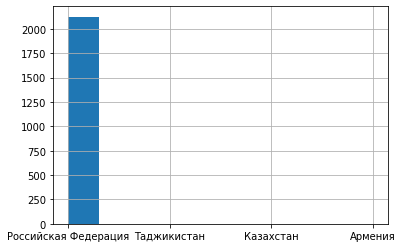

In [ ]:
train['CITIZENSHIP_NAME'].hist()

# frequency encoding is good here - we can see little "tails" here

In [ ]:
regs_by_country = (train.groupby('CITIZENSHIP_NAME').size())
regs_by_country

# most of them a Russia - other countries practically do not make impact

CITIZENSHIP_NAME
Армения                    1
Казахстан                  1
Российская Федерация    2124
Таджикистан                2
dtype: int64

In [ ]:
train['WORKERSRANGE'].describe()

count      13911
unique        12
top       0 .. 5
freq        6183
Name: WORKERSRANGE, dtype: object

In [ ]:
train['WORKERSRANGE'].unique() ## IMPORTANT ORDINAL FEATURE

array(['1001 .. 5000', nan, '51 .. 100', '501 .. 1000', '5000 и более',
       '251 .. 500', '16 .. 50', '6 .. 10', '151 .. 200', '201 .. 250',
       '101 .. 150', '0 .. 5', '11 .. 15'], dtype=object)

In [ ]:
# check the categorial features

cat_features = ['OKFS_GROUP', 'OKOPF_GROUP', 'OKOGU_GROUP', 'OKATO_REGIONCODE', 'OKATO_FED',
               'OKTMO_CODE', 'OKTMO_FED']

In [ ]:
for cat in cat_features:
    print('{}: {}'.format(cat, train[cat].unique()))

OKFS_GROUP: ['Частная собственность' nan 'Государственная собственность'
 'Смешенная российская собственность'
 'Совместная российская и иностранная собственность'
 'Иностранная собственность']
OKOPF_GROUP: ['Коммерческая корпоративная организация' nan
 'Коммерческая унитарная организация' 'Без прав юридического лица'
 'Некоммерческая унитарная организация'
 'Некоммерческая корпоративная организация']
OKOGU_GROUP: ['Группировки хозяйствующих субъектов и общественных объединений' nan
 'Государственная власть в РФ' 'Государственная власть в субъектах РФ'
 'Местное самоуправление в РФ']
OKATO_REGIONCODE: [ 3. nan 33. 71. 45.  7.  4. 12. 24. 25. 37. 42. 46. 40. 35. 80. 84. 86.
 98. 92. 97.  5.  8. 18. 20. 32. 47. 50. 52. 57. 60. 61. 63. 66. 69. 75.
 65. 94. 15. 41. 29. 54. 82. 91. 96. 22. 78.  1. 70. 88. 10. 14. 19. 38.
 49. 53. 64. 58. 28. 68. 36. 27. 56. 73. 95. 17. 79. 83. 90. 30. 85. 89.
 34. 87. 44. 77. 76. 81. 11. 67. 93. 99. 55. 26.]
OKATO_FED: [40. nan 33. 34. 30. 38. 41. 31. 42.]


In [ ]:
train['OKTMO_CODE'].unique().shape

(1765,)

In [ ]:
"""OKTMO_FED - DOUBLE EACH OTHER"""

cats_to_drop = ['OKTMO_FED']
train = train.drop(columns = cats_to_drop)
test = test.drop(columns = cats_to_drop)

In [ ]:
train.shape, test.shape

((17891, 104), (7330, 103))

In [ ]:
cat_features.remove('OKTMO_FED')

In [ ]:
def create_time_features(df, time_feature):
    df[time_feature+'_day'] = df.apply(lambda row: row[time_feature].day, axis = 1)
    df[time_feature+'_year'] = df.apply(lambda row: row[time_feature].year, axis = 1)
    df[time_feature+'_month'] = df.apply(lambda row: row[time_feature].month, axis = 1)

In [ ]:
for f in time_features:
    create_time_features(train, f)
    create_time_features(test, f)

In [ ]:
train.shape, test.shape

((17891, 116), (7330, 115))

In [ ]:
train = train.drop(columns = time_features, axis = 1)
test = test.drop(columns = time_features, axis = 1)

In [ ]:
train[time_features[0]+'_year']

0        1993.0
1           NaN
2        1992.0
3        2005.0
4           NaN
          ...  
17886    2007.0
17887    1997.0
17888    2016.0
17889    2017.0
17890    2005.0
Name: DATEFIRSTREG_year, Length: 17891, dtype: float64

In [ ]:
import category_encoders as ce

cbe_encoder = ce.cat_boost.CatBoostEncoder()

target = train[['TARGET']]
train_cb = train.drop(columns = 'TARGET', axis = 1)

cbe_encoder.fit(train_cb, target)
train_cbe = cbe_encoder.transform(train_cb)
test_cbe = cbe_encoder.transform(test)

In [ ]:
train_cbe.head(10)

,id_contract,id_client,IP_flag,F1100,F1150,F1200,F1210,F1220,F1230,F1240,...,DATEFIRSTREG_month,TAXREGPAY_REGDATE_day,TAXREGPAY_REGDATE_year,TAXREGPAY_REGDATE_month,TAXREG_REGDATE_day,TAXREG_REGDATE_year,TAXREG_REGDATE_month,SIGN_DATE_day,SIGN_DATE_year,SIGN_DATE_month
0,1,1847,0,1.298961e+09,1.125573e+09,1.048287e+10,105901000.0,127510000.0,9.477348e+09,440671000.0,...,8.0,1.0,1960.0,1.0,1.0,2006.0,7.0,1,2018,1
1,2,4650,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,1
2,3,4770,0,7.337400e+07,7.337400e+07,2.161000e+07,2378000.0,NaN,1.764200e+07,1000000.0,...,2.0,1.0,1960.0,1.0,30.0,2002.0,8.0,1,2018,1
3,4,12237,0,1.937488e+09,6.103280e+08,5.786965e+09,12001000.0,71000.0,1.232486e+09,78603000.0,...,7.0,1.0,1960.0,1.0,1.0,2005.0,7.0,1,2018,1
4,5,9988,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,1
5,6,10099,0,2.946220e+08,2.311130e+08,2.805941e+09,110934000.0,6000.0,7.326040e+08,18179000.0,...,10.0,1.0,1960.0,1.0,15.0,2002.0,10.0,1,2018,1
6,7,10714,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,1
7,8,2740,0,2.636311e+10,2.227751e+10,8.184851e+09,467753000.0,382000.0,6.217109e+09,250041000.0,...,8.0,1.0,1960.0,1.0,4.0,2006.0,8.0,1,2018,1
8,9,2310,0,1.700000e+07,1.700000e+07,1.757000e+09,8000000.0,NaN,1.223000e+09,NaN,...,12.0,1.0,1960.0,1.0,7.0,2007.0,12.0,1,2018,1
9,10,3189,0,1.601560e+08,3.415300e+07,3.172194e+09,137000.0,22658000.0,2.877091e+09,NaN,...,1.0,1.0,1960.0,1.0,11.0,2005.0,1.0,1,2018,1


In [ ]:
%%time

import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train_cbe.values, k=15)

CPU times: user 3min 10s, sys: 21.7 ms, total: 3min 10s
Wall time: 3min 10s


In [ ]:
imputed_test = fast_knn(test_cbe.values, k=15)

In [ ]:
imputed_training.shape, imputed_test.shape

((17891, 111), (7330, 111))

In [ ]:
target = target.values

In [ ]:
target.shape

(17891, 1)

In [ ]:
target = target.squeeze()
target.shape

(17891,)

In [ ]:
X = imputed_training
y = target
X_test = imputed_test

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

predictions_array =[]
CV_score_array    =[]
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    clf = TabNetClassifier(seed=42)
    clf.fit(X_train=X_train, y_train=y_train,
              eval_set=[(X_valid, y_valid)],
              patience=10, max_epochs=100,
              eval_metric=['auc'])
    CV_score_array.append(clf.best_cost)
    predictions_array.append(np.expm1(clf.predict_proba(X_test)[:, 1]))

Device used : cpu
epoch 0  | loss: 0.7453  | val_0_auc: 0.49484 |  0:00:00s
epoch 1  | loss: 0.65206 | val_0_auc: 0.45038 |  0:00:01s
epoch 2  | loss: 0.60575 | val_0_auc: 0.48938 |  0:00:02s
epoch 3  | loss: 0.58054 | val_0_auc: 0.50113 |  0:00:03s
epoch 4  | loss: 0.55013 | val_0_auc: 0.60136 |  0:00:04s
epoch 5  | loss: 0.50025 | val_0_auc: 0.61866 |  0:00:05s
epoch 6  | loss: 0.466   | val_0_auc: 0.48991 |  0:00:06s
epoch 7  | loss: 0.44736 | val_0_auc: 0.48197 |  0:00:07s
epoch 8  | loss: 0.4371  | val_0_auc: 0.49003 |  0:00:08s
epoch 9  | loss: 0.43049 | val_0_auc: 0.46302 |  0:00:08s
epoch 10 | loss: 0.42859 | val_0_auc: 0.46714 |  0:00:09s
epoch 11 | loss: 0.42252 | val_0_auc: 0.44818 |  0:00:10s
epoch 12 | loss: 0.42002 | val_0_auc: 0.32004 |  0:00:11s
epoch 13 | loss: 0.41779 | val_0_auc: 0.28049 |  0:00:12s
epoch 14 | loss: 0.41358 | val_0_auc: 0.28717 |  0:00:12s
epoch 15 | loss: 0.40651 | val_0_auc: 0.22116 |  0:00:13s

Early stopping occurred at epoch 15 with best_epoch =

In [ ]:
predictions = np.mean(predictions_array,axis=0)

In [ ]:
predictions

array([0.32646632, 0.8497669 , 0.6593019 , ..., 0.4104674 , 0.38528123,
       0.323643  ], dtype=float32)

In [ ]:
test['TARGET'] = predictions

In [ ]:
test[['id_contract', 'TARGET']].to_csv('tabnet_1.csv', sep=';', index=False)
test[['id_contract', 'TARGET']].head()

,id_contract,TARGET
0,17892,0.326466
1,17893,0.849767
2,17894,0.659302
3,17895,0.391712
4,17896,0.814483


In [ ]:
train.to_csv('train_processed.csv', index = False)
test.to_csv('test_processed.csv', index = False)

In [ ]:
train.shape, test.shape

((17891, 112), (7330, 111))